In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
bike = pd.read_csv ("30th April.csv")

In [6]:
bike.head()

,Location,wkday_ct,wkend_ct,Trips,TrafDir,BikeInfra,SegNum,StLength,Rd_Wd,Ld_CR,Ld_IM,Ld_M,Ld_OS,Ld_R,Ld_U,pop_dens,AMI,Tdir
0,49 Ave,139,120,259,W,0,30,10891,60,0,0,0,0,0,0,17,129806,0
1,46 Rd,95,73,168,W,0,20,7364,60,0,0,0,0,0,0,9,117380,0
2,44 Rd,24,12,36,A,0,9,2792,60,0,0,0,0,0,0,3,123250,0
3,Vernon Blvd,873,566,1439,T,1,79,18112,75,0,0,0,0,0,1,8,33864,1
4,Broadway (1),1385,1303,2688,T,0,145,24855,80,1,0,0,0,0,0,17,67085,1


In [5]:
bike ['Tdir'] = bike ['TrafDir'].map ({'W':0, 'A':0, 'T':1})

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = np.asarray(bike[['SegNum', 'Ld_CR', 'pop_dens', 'BikeInfra', 'Tdir']])
Y = np.asarray(bike['Trips'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

In [10]:
lineReg = LinearRegression()

In [11]:
lineReg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('Intercept: ', lineReg.score(X, Y))
print('Coefficients: ', lineReg.coef_)

Intercept:  0.34154683297354405
Coefficients:  [  2.32906957 776.45622638   5.95755051 389.81899911 192.84480747]


In [13]:
results = lineReg.fit(X_train, y_train)

In [14]:
lineReg.score(X_train,y_train)

0.5760711655445732

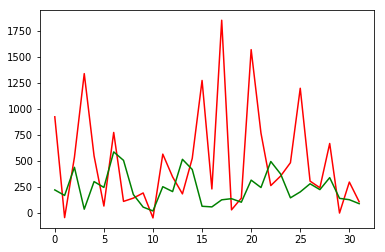

In [15]:
plt.plot(lineReg.predict(X_test), c= 'red', label = 'Predicted Counts' )
plt.plot(y_test, c= 'green')
plt.show()

In [16]:
print (lineReg.predict(X_test))

[ 9.23145520e+02 -4.47599076e+01  5.34853326e+02  1.33765953e+03
  5.47766143e+02  6.62381722e+01  7.72755451e+02  1.10932538e+02
  1.42224534e+02  1.91749914e+02 -4.77948629e+01  5.64609654e+02
  3.45838801e+02  1.82965153e+02  5.23845701e+02  1.27208211e+03
  2.30309192e+02  1.85017014e+03  2.97089768e+01  1.42224534e+02
  1.56802654e+03  7.66149283e+02  2.62691858e+02  3.54024875e+02
  4.82251467e+02  1.19710062e+03  3.05483464e+02  2.41894600e+02
  6.66820261e+02 -9.63429592e-01  2.96592002e+02  1.07192195e+02]


# Ridge Regression

In [17]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = 0.05)


In [18]:
reg.fit(X_train, y_train)
print('Intercept: ', reg.score(X_test, y_test))
print('Coefficients: ', reg.coef_)


Intercept:  -12.903187946166328
Coefficients:  [   4.35184188 1369.52101499    4.96496459  441.61843919   98.9493032 ]


In [19]:
reg.score(X_train,y_train)

0.5759359573322385

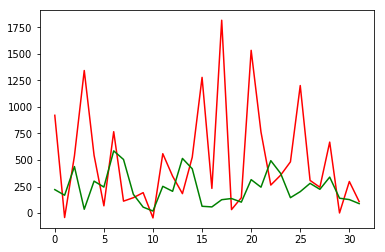

In [20]:
plt.plot(reg.predict(X_test), c= 'red', label = 'Predicted Counts')
plt.plot(y_test, c= 'green')
plt.show()

# Lasso Regression

In [21]:
from sklearn import linear_model
lasso = linear_model.Lasso (alpha = 0.05)


In [22]:
lasso.fit(X,Y)


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
print('Intercept: ', lasso.score(X_test, y_test))
print('Coefficients: ', lasso.coef_)


Intercept:  -3.763646802511298
Coefficients:  [  2.32949977 774.95614113   5.95426704 389.27391055 192.48648939]


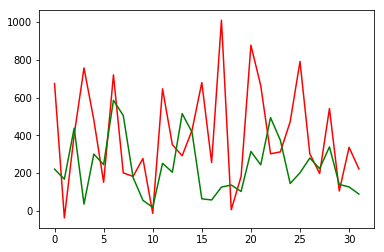

In [24]:
plt.plot(lasso.predict(X_test), c= 'red', label = 'Predicted Counts')
plt.plot(y_test, c= 'green')
plt.show()

In [25]:
lasso.score(X_train,y_train)

0.4577973309380308

# Checking with 1000 iterations

In [26]:
Intercept = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    Intercept.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(Intercept))
print(np.mean(coefs, axis=0))


Linear Regression
-0.1326006898039175
[  2.33716022 726.52612607   5.82117187 388.05827334 178.56537604]


In [27]:

Intercept = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = 0.05)
    lineReg.fit(X_train, y_train)
    Intercept.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(Intercept))
print(np.mean(coefs, axis=0))


Ridge Regression
-0.08288992649621264
[  2.33695295 724.23719415   5.97249291 372.67780483 181.3861651 ]
